In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
from utils import load_pickle, save_pickle
from lib.log import logger

2022-09-13 09:59:51,272 Note: NumExpr detected 56 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2022-09-13 09:59:51,273 NumExpr defaulting to 8 threads.


In [ ]:
# import re
# import string
# from zhon.hanzi import punctuation as hanzi_punctuation
# import emoji
# import nltk
# from nltk.corpus import stopwords
# from textblob import TextBlob

# stop_words = stopwords.words('english')

# def preprocess_text(text: str) -> str:
#     text = re.sub(r'RT @(\w+): ', ' ', text)
#     text = re.sub(r'@[\w_]+', ' ', text)
#     text = re.sub(r'http(s?)://[a-zA-Z0-9.?/&=:]+', ' ', text)
#     text = re.sub(r'[\\\'\’\‘]', ' ', text)
#     text = re.sub(r'\w+…', lambda match: str(TextBlob(match.group()[:-1]).correct()), text)
#     text = re.sub(r'\d+', ' _NUMBER_ ', text)
#     text = re.sub(r'[{}]+'.format(string.punctuation), ' ', text)
#     text = re.sub(r'[{}]+'.format(hanzi_punctuation), ' ', text)
#     text = emoji.demojize(text, delimiters=(' _','_ '))
#     text = " ".join(word for word in nltk.wordpunct_tokenize(text) if word not in stop_words)
#     text = re.sub(r' +', ' ', text) # 去除多余的空格
#     return text

# docs_l = []
# for i in range(10):
#     docs = " _END_ ".join([preprocess_text(elem["text"]) for elem in user_texts[i].values()])
#     docs_l.append(docs)

# ptexts = load_pickle("/root/Lab_Related/data/Heter-GAT/Modified_/ProcessedTexts_PerUser3-01.p")

# nptexts = []
# for texts in ptexts:
#     nptexts.extend(texts.split(' _END_ '))
# print(len(nptexts))
# save_pickle(nptexts, "lda-texts/ptexts_u20000.p")

# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation

# ptexts = load_pickle("/root/Lab_Related/data/Heter-GAT/Modified_/ProcessedTexts_PerUser3-0.p")

# cv1 = CountVectorizer(stop_words="english")
# dtm1 = cv1.fit_transform(ptexts)

# LDA_model = LatentDirichletAllocation(n_components=20, max_iter=50, random_state=2022)
# LDA_model.fit(dtm1)
# # cv1.get_feature_names()

# # Topic-Word
# logger.info(len(LDA_model.components_[0]))
# for i, topic in enumerate(LDA_model.components_):
#     logger.info("THE TOP {} WORDS FOR TOPIC #{}".format(10, i))
#     logger.info([cv1.get_feature_names()[index] for index in topic.argsort()[-10:]])

# # Doc-Topic
# doc_topic = LDA_model.transform(dtm1)
# for n in range(doc_topic.shape[0]):
#     topic_pr = doc_topic[n].argsort()[-10:]
#     # topic_pr = doc_topic[n].argmax()
#     logger.info("doc: {} topic: {}".format(n,topic_pr))

# import pyLDAvis.sklearn

# pyLDAvis.enable_notebook() # To enable the visualization on the notebook

# panel = pyLDAvis.sklearn.prepare(LDA_model, dtm1, cv1, mds='tsne') # Create the panel for the visualization
# # pyLDAvis.display(panel)
# pyLDAvis.save_html(panel, 'LDA-vis.html')

In [2]:
# NOTE:

# 1. User-Texts (Tot=60536760)
"""
2022-09-12 14:25:56,013 ends_idx=0, cnt=5199706
2022-09-12 14:25:56,037 ends_idx=1, cnt=5227872
2022-09-12 14:25:56,061 ends_idx=2, cnt=6509934
2022-09-12 14:25:56,083 ends_idx=3, cnt=7211312
2022-09-12 14:25:56,103 ends_idx=4, cnt=6981609
2022-09-12 14:25:56,123 ends_idx=5, cnt=6520313
2022-09-12 14:25:56,142 ends_idx=6, cnt=6288515
2022-09-12 14:25:56,162 ends_idx=7, cnt=5206646
2022-09-12 14:25:56,185 ends_idx=8, cnt=6026095
2022-09-12 14:25:56,208 ends_idx=9, cnt=5364758
"""

# 2. nptexts (Tot=60536760)
"""
2022-09-12 14:17:18,655 5199706
2022-09-12 14:17:28,077 5227872
2022-09-12 14:17:33,393 6509934
2022-09-12 14:17:39,061 7211312
2022-09-12 14:17:49,219 6280907 -> 6981609
2022-09-12 14:17:53,809 5831563 -> 6520313
2022-09-12 14:18:02,212 5594957 -> 6288515
2022-09-12 14:18:06,484 5206646
2022-09-12 14:18:14,310 6026095
2022-09-12 14:18:17,863 5364758
"""

In [2]:
# NOTE: Associate Tweetid with Its LDA-Feat

# Get Tweetids
# text2tweet_id = []
# for user, texts in user_texts.items():
#     text2tweet_id.extend(list(texts.keys()))
# logger.info(len(text2tweet_id))
# save_pickle(text2tweet_id, "text2tweet_id.p")
# text2tweet_id = load_pickle("text2tweet_id.p")

# doc2topic = []
# for idx in range(1,11):
#     doc2topic.extend(load_pickle(f"lda-model/doc_topic_0{idx}.p"))
# print(len(doc2topic))
# save_pickle(doc2topic, "heter-training/doc2topic_tweetfeat.p")

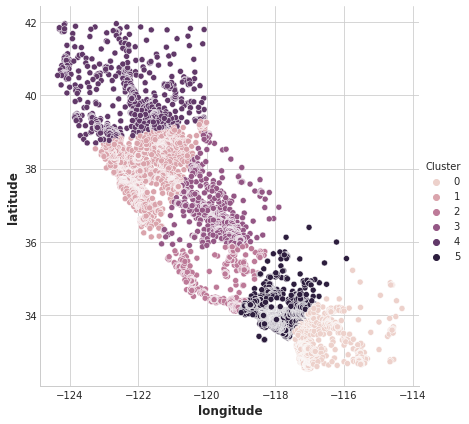

In [10]:
# Mini-Batch K-Means According to LDA topic-distribution

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MiniBatchKMeans

data = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")
# data = data.loc[:, ["median_income", "latitude", "longitude"]]
data = data.loc[:, ["latitude", "longitude"]]

kmeans = MiniBatchKMeans(n_clusters=6, random_state=0, batch_size=6)
data["Cluster"] = kmeans.fit_predict(data)
data["Cluster"] = data["Cluster"].astype("int")

plt.style.use('seaborn-whitegrid')
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight='bold', labelsize='large', titleweight='bold', titlesize=14, titlepad=10)
sns.relplot(x='longitude', y='latitude', hue='Cluster', data=data, height=6)
plt.show()

In [3]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation

# usertext_docs = load_pickle("/root/Lab_Related/data/Heter-GAT/Modified_/ProcessedTexts_PerUser.p")

# df = pd.DataFrame({
#     "text": usertext_docs,
# })
# NUM_SAMPLES = 20000
# sample_df = df.sample(NUM_SAMPLES, replace=False).reset_index(drop=True)
# sample_df.sample(5)


# cv = CountVectorizer(max_df=0.95, min_df=10, stop_words="english")
# dtm = cv.fit_transform(sample_df['text'])
# feature_names = cv.get_feature_names()
# print(f"total number of distinct words={len(feature_names)}")

# LDA_model = LatentDirichletAllocation(n_components=5, max_iter=30, random_state=2022)
# LDA_model.fit(dtm)
# print(len(LDA_model.components_[0]))

# for i, topic in enumerate(LDA_model.components_):
#     print("THE TOP {} WORDS FOR TOPIC #{}".format(10, i))
#     print([cv.get_feature_names()[index] for index in topic.argsort()[-10:]])
#     print("\n")

# import pyLDAvis.sklearn

# pyLDAvis.enable_notebook() # To enable the visualization on the notebook

# panel = pyLDAvis.sklearn.prepare(LDA_model, dtm, cv, mds='tsne') # Create the panel for the visualization
# panel